In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

OCSVM (linear kernel)
Balanced accuracy: 0.9833333333333334
ROC AUC: 1.0


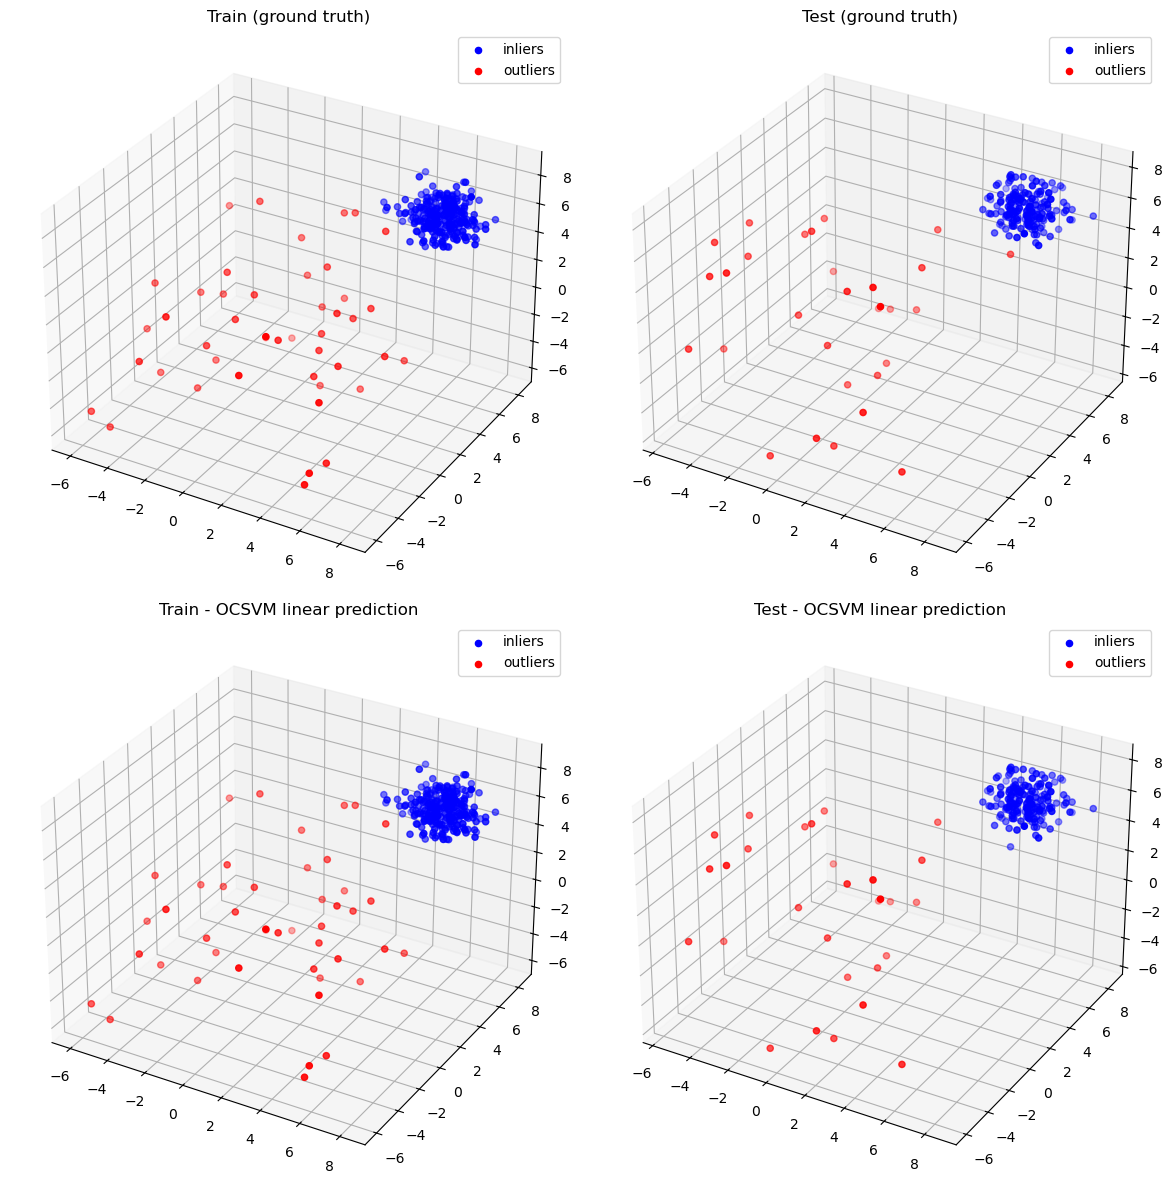

In [18]:
# Ex. 1
# 1. In the first exercise you will use generate data() function from pyod.utils.data to generate a 3-dimensional dataset
# with 300 training samples and 200 test samples using a contamination of 0.15.
# 2. You will fit an OCSVM model (from pyod.models.ocsvm) using the training data and then you will predict the labels for
# test data. Use the linear kernel and the contamination rate specified above. Compute the balanced accuracy and the ROC AUC
# for the test data.
# 3. Create 4 3D subplots where you will plot the test and training data (using different colors for inliers and outliers) for
# both the ground truth and the predicted labels.
# 4. Observe how the predicted labels change when you use an RBF kernel.
# 5. Perform steps 2 and 3 for DeepSVDD model from pyod.models.deep svdd

# using the generate_data() function to generate a 3-dimensional dataset
# 300 training samples, 200 test samples, contamination of 0.15
train_data, test_data, train_labels, test_labels = generate_data(
    n_train=300,
    n_test=200,
    n_features=3,
    contamination=0.15,
    random_state=42
)

# fitting the ocsvm model with the training data
ocsvm_linear = OCSVM(kernel='linear', contamination=0.15)
ocsvm_linear.fit(train_data)

# predicting the labels for test data
labels_pred_linear = ocsvm_linear.labels_
test_labels_pred_linear = ocsvm_linear.predict(test_data)
test_labels_scores_linear = ocsvm_linear.decision_function(test_data)

# computing the balanced accuracy and the ROC AUC for the test data
ba = balanced_accuracy_score(test_labels, test_labels_pred_linear)
auc = roc_auc_score(test_labels, test_labels_scores_linear)

print("OCSVM (linear kernel)")
print("Balanced accuracy:", ba)
print("ROC AUC:", auc)

def plot_3d_data(ax, X, y, title):
    ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], c='blue', label='inliers')
    ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], c='red', label='outliers')
    ax.set_title(title)
    ax.legend()

fig = plt.figure(figsize=(12, 12))

# ground truth train
ax1 = fig.add_subplot(221, projection='3d')
plot_3d_data(ax1, train_data, train_labels, "Train (ground truth)")

# ground truth test
ax2 = fig.add_subplot(222, projection='3d')
plot_3d_data(ax2, test_data, test_labels, "Test (ground truth)")

# predicted train
ax3 = fig.add_subplot(223, projection='3d')
plot_3d_data(ax3, train_data, labels_pred_linear, "Train - OCSVM linear prediction")

# predicted test
ax4 = fig.add_subplot(224, projection='3d')
plot_3d_data(ax4, test_data, test_labels_pred_linear, "Test - OCSVM linear prediction")

plt.tight_layout()
plt.show()

In [19]:
# changing kernel to rbf
ocsvm_rbf = OCSVM(kernel='rbf', contamination=0.15)
ocsvm_rbf.fit(train_data)

test_labels_pred_rbf = ocsvm_rbf.predict(test_data)
test_scores_rbf = ocsvm_rbf.decision_function(test_data)

ba_rbf = balanced_accuracy_score(test_labels, test_labels_pred_rbf)
auc_rbf = roc_auc_score(test_labels, test_scores_rbf)

print("OCSVM (RBF kernel)")
print("Balanced accuracy:", ba_rbf)
print("ROC AUC:", auc_rbf)

OCSVM (RBF kernel)
Balanced accuracy: 0.9803921568627452
ROC AUC: 0.9998039215686275


Epoch 1/30, Loss: 9.53957912325859
Epoch 2/30, Loss: 10.480377942323685
Epoch 3/30, Loss: 10.336290419101715
Epoch 4/30, Loss: 9.884566962718964
Epoch 5/30, Loss: 10.291263967752457
Epoch 6/30, Loss: 9.839298397302628
Epoch 7/30, Loss: 9.48530375957489
Epoch 8/30, Loss: 10.544545829296112
Epoch 9/30, Loss: 9.916335880756378
Epoch 10/30, Loss: 9.624731093645096
Epoch 11/30, Loss: 10.470578730106354
Epoch 12/30, Loss: 9.55753019452095
Epoch 13/30, Loss: 9.878903716802597
Epoch 14/30, Loss: 9.506616681814194
Epoch 15/30, Loss: 9.921923235058784
Epoch 16/30, Loss: 10.446040153503418
Epoch 17/30, Loss: 9.753419399261475
Epoch 18/30, Loss: 9.652604967355728
Epoch 19/30, Loss: 10.317203551530838
Epoch 20/30, Loss: 9.461905017495155
Epoch 21/30, Loss: 9.824529230594635
Epoch 22/30, Loss: 10.438121229410172
Epoch 23/30, Loss: 9.511541843414307
Epoch 24/30, Loss: 10.482016950845718
Epoch 25/30, Loss: 9.821994006633759
Epoch 26/30, Loss: 9.436112716794014
Epoch 27/30, Loss: 10.15538278222084
Epoc

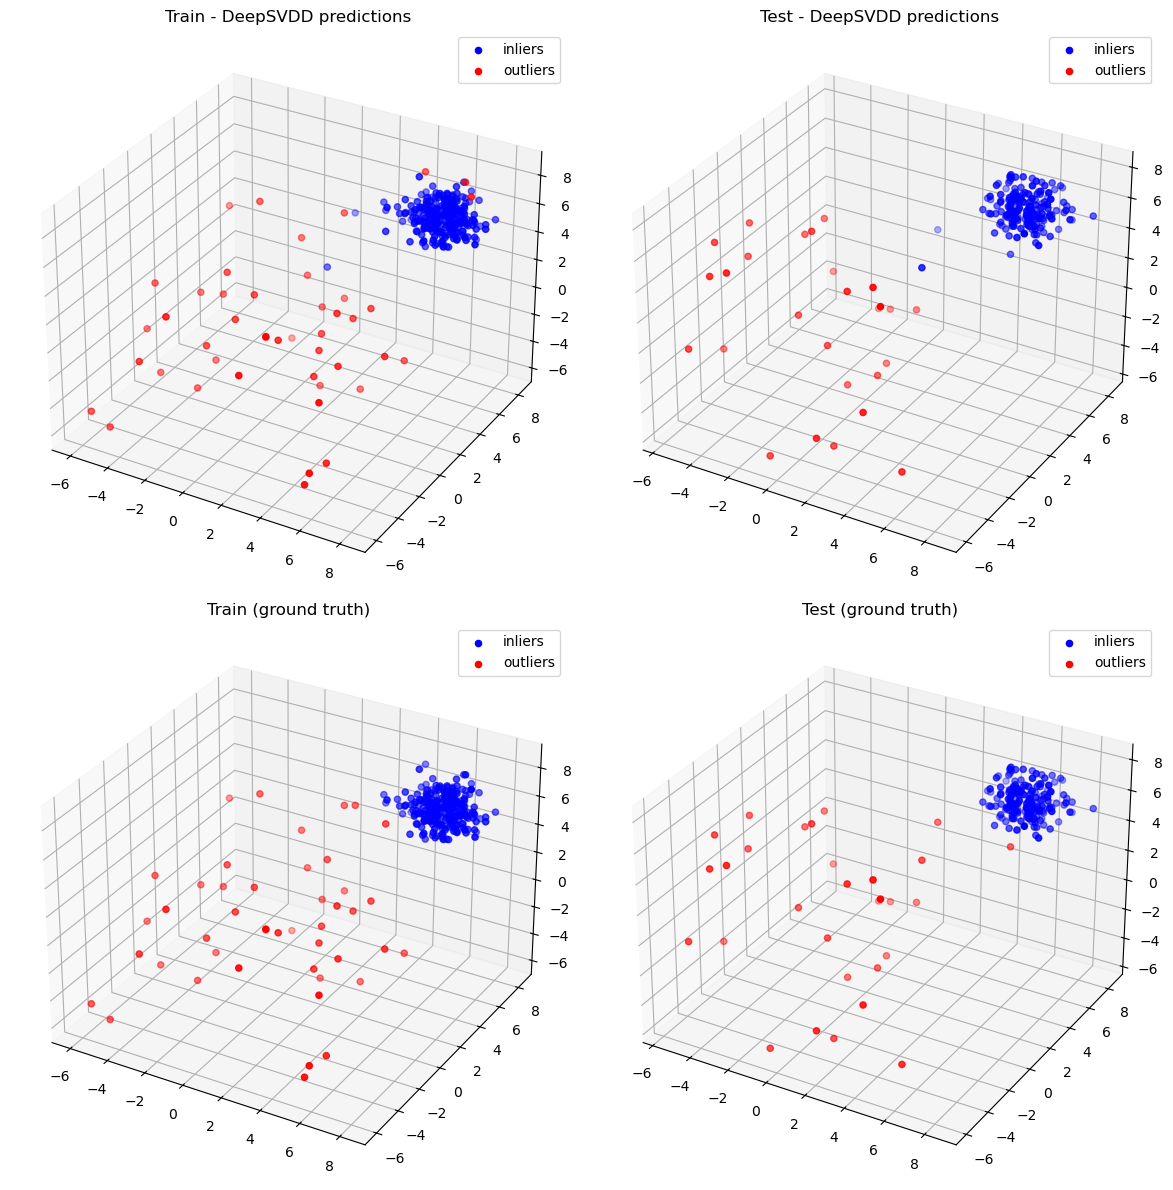

In [20]:
# steps 2 and 3 with DeepSVDD model
deep_svdd = DeepSVDD(contamination=0.15, epochs=30, batch_size=32, n_features=3)
deep_svdd.fit(train_data)

train_labels_pred_svdd = deep_svdd.labels_
test_labels_pred_svdd = deep_svdd.predict(test_data)
scores_svdd = deep_svdd.decision_function(test_data)

ba_svdd = balanced_accuracy_score(test_labels, test_labels_pred_svdd)
auc_svdd = roc_auc_score(test_labels, scores_svdd)

print("DeepSVDD results")
print("Balanced accuracy:", ba_svdd)
print("ROC AUC:", auc_svdd)

fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(221, projection='3d')
plot_3d_data(ax1, train_data, train_labels_pred_svdd, "Train - DeepSVDD predictions")

ax2 = fig.add_subplot(222, projection='3d')
plot_3d_data(ax2, test_data, test_labels_pred_svdd, "Test - DeepSVDD predictions")

ax3 = fig.add_subplot(223, projection='3d')
plot_3d_data(ax3, train_data, train_labels, "Train (ground truth)")

ax4 = fig.add_subplot(224, projection='3d')
plot_3d_data(ax4, test_data, test_labels, "Test (ground truth)")

plt.tight_layout()
plt.show()

In [9]:
# Ex. 2
# 1. In this exercise you will use the cardio dataset from ODDS (https://odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/).
# You will split the dataset into a training set consisting of 40% of the data and a testing set.
# 2. You will use a cross-validation grid-search over a predefined map of possible parameters of OneClassSVM (from
# sklearn.svm) in order to find the ones that offer best results. The map of possible parameters must contain different
# kernels, different values for gamma parameter (for kernels that use it) and different values for the ν parameter
# (including the contamination rate of train set).
# 3. GridSearchCV from sklearn.model selection will be used to perform the grid-search over the training set using
# Balanced Accuracy as score. The same metric will be reported for the model trained with the best parameters discovered
# by GridSearchCV (tested on the test set).
# 4. GridSearchCV will have to perform standardization; for this, it will use a Pipeline from sklearn.pipeline that will
# perform standardization using StandardScaler before fitting the OneClassSVM model.
# 5. You have to pay attention to the labels returned by OneClassSVM model (from sklearn): -1 for outliers and 1 for
# inliers. If you want to convert them to the pyod format you can use3label pyod = (−1 ∗ label sklearn + 1)/2
# In the current exercise you will perform the conversion from pyod format to sklearn for the ground truth labels
# 6. Print the best parameters discovered by GridSearchCV and the balanced accuracy obtained by the model (trained with
# those parameters on the entire training dataset) when evaluating the testing set.

from scipy.io import loadmat

# loading the dataset
data = loadmat("cardio 1.mat")
X = data['X']
y = data['y'].ravel()
y = (y == 1).astype(int)

# splitting the dataset into a training set consisting of 40% of the data and a testing set
train_data, test_data, train_labels, test_labels = train_test_split(X, y, train_size=0.4, random_state=42, stratify=y)

# defining possible parameter grid
param_grid = [
    {'ocsvm__kernel': ['rbf'], 
     'ocsvm__gamma': ['scale','auto',0.01,0.1,1,10],
     'ocsvm__nu':[0.1,0.15,0.2,0.25,0.3]},
    {'ocsvm__kernel': ['poly'], 
     'ocsvm__gamma':['scale','auto',0.01,0.1,1], 
     'ocsvm__nu':[0.1,0.15,0.2,0.25]},
    {'ocsvm__kernel': ['linear'], 
     'ocsvm__nu':[0.1,0.15,0.2,0.25]}
]

# building the pipeline: standardization + OneClassSVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ocsvm', OneClassSVM())
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with balanced accuracy
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=cv,
    n_jobs=-1
)

# fitting GridSearchCV
grid_search.fit(train_data, train_labels)

# best parameters
print("Best parameters found:", grid_search.best_params_)

# evaluating on test set
best_model = grid_search.best_estimator_
test_pred_skl = best_model.predict(test_data)

# converting back to pyod format
test_pred = (-1 * test_pred_skl + 1) // 2

# computing balanced accuracy
ba_test = balanced_accuracy_score(test_labels, test_pred)
print("Balanced accuracy on test set:", ba_test)

Best parameters found: {'ocsvm__gamma': 0.01, 'ocsvm__kernel': 'poly', 'ocsvm__nu': 0.1}
Balanced accuracy on test set: 0.40665792623838565


In [10]:
# Ex. 3
# 1. For this exercise we will need to download the shuttle dataset from ODDS (https://odds.cs.stonybrook.edu/shuttle-dataset/).
# Load the data using scipy.io.loadmat() and use train test split() to split it into train and test subsets (use 50% of data
# for testing). Normalize your data accordingly.
# 2. Fit OCSVM and DeepSVDD models (from pyod) using the training data and compute the balanced accuracy (BA) and the area
# under the curve for the testing data for both models (ROC AUC - using sklearn.metrics.roc auc score).
# 3. Use different architectures for DeepSVDD and compute the 2 aforementioned metrics for each case.

from scipy.io import loadmat
import warnings
warnings.filterwarnings("ignore")

# loading the dataset
data = loadmat("shuttle 1.mat")
X = data['X']
y = data['y'].ravel()
y = (y != 1).astype(int)

# splitting the dataset
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# normalizing data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

contamination = 0.07

# fitting OCSVM
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=contamination)
ocsvm.fit(train_data)

test_labels_pred_ocsvm = ocsvm.predict(test_data)
test_labels_pred_ocsvm_pyod = (-1 * test_labels_pred_ocsvm + 1) // 2 # converting to pyod format
test_labels_scores_ocsvm = -ocsvm.decision_function(test_data) # higher scores = more anomalous

ba_ocsvm = balanced_accuracy_score(test_labels, test_labels_pred_ocsvm_pyod)
roc_ocsvm = roc_auc_score(test_labels, test_labels_scores_ocsvm)

print("OCSVM results")
print("Balanced accuracy:", ba_ocsvm)
print("ROC AUC:", roc_ocsvm)

# fitting DeepSVDD with different architectures
architectures = [
    [32, 16],
    [64, 32]
]

for i, arch in enumerate(architectures, 1):
    deep_svdd = DeepSVDD(contamination=contamination, epochs=30, batch_size=64, hidden_neurons=arch, n_features=train_data.shape[1])
    deep_svdd.fit(train_data)
    
    test_labels_pred_svdd = deep_svdd.predict(test_data)
    test_labels_scores_svdd = deep_svdd.decision_function(test_data)
    
    ba_svdd = balanced_accuracy_score(test_labels, test_labels_pred_svdd)
    roc_svdd = roc_auc_score(test_labels, test_labels_scores_svdd)
    
    print(f"\nDeepSVDD Architecture {i} {arch} results")
    print("Balanced accuracy:", ba_svdd)
    print("ROC AUC:", roc_svdd)

OCSVM results
Balanced accuracy: 0.2941869391623752
ROC AUC: 0.14218375901085406
Epoch 1/30, Loss: 132.96944428235292
Epoch 2/30, Loss: 132.99310240149498
Epoch 3/30, Loss: 132.98944277316332
Epoch 4/30, Loss: 133.035684466362
Epoch 5/30, Loss: 133.06827860325575
Epoch 6/30, Loss: 133.01777909696102
Epoch 7/30, Loss: 133.21449172496796
Epoch 8/30, Loss: 133.05610398948193
Epoch 9/30, Loss: 132.96858274936676
Epoch 10/30, Loss: 133.1255094408989
Epoch 11/30, Loss: 133.03842800855637
Epoch 12/30, Loss: 133.05453103780746
Epoch 13/30, Loss: 133.05905366688967
Epoch 14/30, Loss: 133.00805564969778
Epoch 15/30, Loss: 133.01793812960386
Epoch 16/30, Loss: 133.02287625521421
Epoch 17/30, Loss: 133.01321183890104
Epoch 18/30, Loss: 133.04156156629324
Epoch 19/30, Loss: 133.03284537792206
Epoch 20/30, Loss: 133.04804001003504
Epoch 21/30, Loss: 133.09334163367748
Epoch 22/30, Loss: 133.04232589155436
Epoch 23/30, Loss: 133.02339828014374
Epoch 24/30, Loss: 132.9621870815754
Epoch 25/30, Loss: 1